Необходимо найти все действительные корни уравнения:

$x^6 - 6x^5 + 20x^4 - 40x^3 + 49x^2 - 34x + 10 = 0$

с точностью до $\epsilon = 10^{-6}$

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [12]:
a = [1, -6, 20, -40, 49, -34, 10]   #Коэфициенты уравнения

for i in range(len(a)):
    a[i] = int(a[i])

In [13]:
def f(x):
    return x**6 + a[1]*x**5 + a[2]*x**4 + a[3] * x**3 + a[4] * x**2 + a[5] * x + a[6]  

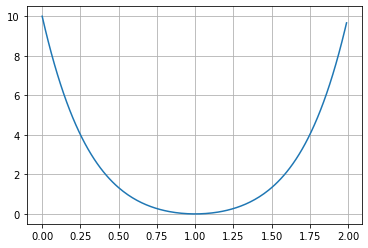

In [14]:
x_es = np.arange(0, 2, 0.01)
y_es = f(x_es)

fig, ax = plt.subplots()

ax.plot(x_es, y_es)
ax.grid()

plt.show()

Покажем, что корень находится на отрезке от 0 до 2, и при том единственный:

1. при $\;\; x < 0 \to f(x) = x^6 + 6x^5 + 20x^4 + 40x^3 + 49x^2 + 34x + 10 > 0 \;\;$ для $\;\; \forall x$

2. при $\;\; x > 2 \to f(x) = x^6 - 6x^5 + 20x^4 - 40x^3 + 49x^2 - 34x + 10 = (x^6 + 20x^4 + 49x^2) - (6x^5 + 40x^3 + 34x) + 10 = h(x) - g(x) + 10 \Rightarrow$

$h'(x) > 0,\; g'(x) > 0 \;\;\forall x \in [2, \infty] $

Очевидно, что h(x) растет быстрее g(x), начиная с какой - то точки, так как у h(x) - больше старшая степень, проверим точку 2.
Если в этой точке h(x) 1) растет быстрее и 2) - больше, тогда начиная с точки 2 и далее f(x) - строго положительна:

In [21]:
def h(x):
    return x**6 + 20*x**4 + 49*x**2
def h_1(x):
    return 6*x**5 + 80*x**3 + 98*x
def g(x):
    return 6*x**5 + 40*x**3 + 34*x
def g_1(x):
    return 30*x**4 + 120*x**2 + 34

In [22]:
print("Значения функций в точке х = 2: ", h(2), g(2))
print("Значения производных функций в точке х = 2: ", h1(2), g1(2))

Значения функций в точке х = 2:  580 580
Значения производных функций в точке х = 2:  1028 994


Из полученных результатов можно придти к выводу, что корень уравнения находится на отрезке от [0, 2]

In [23]:
def next_x(x):
    return x - (f(x)/(h1(x) - g1(x)))
def f_2(x):
    return 30*x**4 -120*x**3 + 240*x**2 - 240*x+98
def f_1(x):
    return h_1(x) - g_1(x)

Возьмем отрезок от [1, 4], на нем выполняются все условия теормы Ньютона $\to$

In [36]:
pr_x = 3
x = 2
while abs(pr_x - x) >= f_2(4)/(2*f_1(4)) * 10**-6:
    pr_x = x
    x = next_x(x)
    

    
print(x)

1.0000005836656813
